In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('indonesia_salary.csv')
X = dataset.iloc[:, [2, 1]].values
y = dataset.iloc[:, -1].values

In [3]:
X

array([[   1997,  128000],
       [   1997,  151000],
       [   1997,  119000],
       ...,
       [   2022, 3200000],
       [   2022, 3561932],
       [   2022, 2644709]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
X_train

array([[   2020, 2981379],
       [   2018, 2559903],
       [   2006,  822500],
       ...,
       [   2016, 1906650],
       [   2014, 1700000],
       [   2017, 2598000]])

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_train

array([[ 1.37514408,  1.9840483 ],
       [ 1.10658217,  1.52182004],
       [-0.5047893 , -0.38357139],
       ...,
       [ 0.83802026,  0.80540441],
       [ 0.56945835,  0.57877355],
       [ 0.97230121,  1.56360062]])

Training the K-NN model on the Training set

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print(y_pred)
print(y_test)

[2019 2020 1999 2005 2006 2017 2006 2017 2015 2012 2000 2016 2022 2016
 2001 2002 2014 2019 2001 2020 2019 2011 1998 2016 2015 2001 2006 1998
 2017 2009 2004 2018 2022 2010 1997 2013 2022 2007 2005 2006 2011 2003
 2005 2019 2017 2015 1997 2022 2020 2013 2012 2005 2016 2007 2005 2017
 1999 2005 1997 2019 2007 2021 2011 2004 2020 2018 2008 2020 2005 2000
 2012 2013 2012 2014 2017 2022 2007 2007 2012 2003 2013 2021 2005 2000
 2021 2011 2013 2020 2012 2016 2002 2022 2008 2005 2021 2005 2011 2003
 2018 2018 2005 2016 2009 2020 2014 2004 2000 2011 2007 1997 1998 2008
 1998 2003 2017 2001 2008 2005 2003 2006 2008 2013 2010 2021 2007 2010
 2013 2006 2005 1999 1999 2011 2020 2004 2013 2015 2003 2008 2001 2016
 1999 2007 1999 2014 2002 2014 2009 2008 1997 2009 2016 2002 2021 2012
 2015 2007 2001 2010 2013 2008 2004 2006 2018 2007 2002 2013 2008 2016
 2005 2022 1998 1998 2015 2004 2016 2009 1998 2022 2010 1997 2006 2002
 2003 2020 1998 2022 2006 2016 2000 2013 2002 2021 2021 2021 1997 2012
 1999 

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0

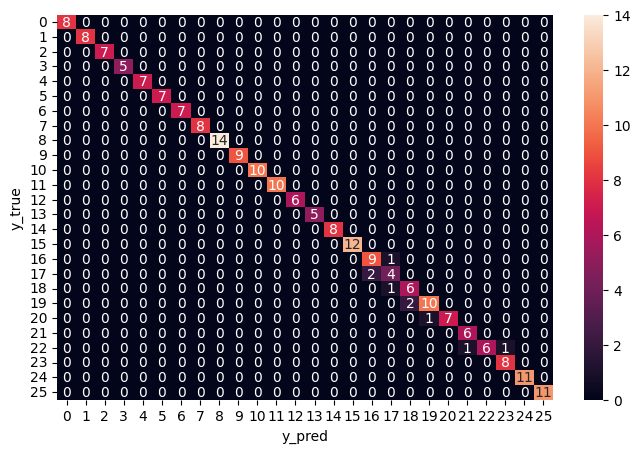

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [13]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1997       1.00      1.00      1.00         8
        1998       1.00      1.00      1.00         8
        1999       1.00      1.00      1.00         7
        2000       1.00      1.00      1.00         5
        2001       1.00      1.00      1.00         7
        2002       1.00      1.00      1.00         7
        2003       1.00      1.00      1.00         7
        2004       1.00      1.00      1.00         8
        2005       1.00      1.00      1.00        14
        2006       1.00      1.00      1.00         9
        2007       1.00      1.00      1.00        10
        2008       1.00      1.00      1.00        10
        2009       1.00      1.00      1.00         6
        2010       1.00      1.00      1.00         5
        2011       1.00      1.00      1.00         8
        2012       1.00      1.00      1.00        12
        2013       0.82      0.90      0.86        10
        2014       0.67    

<ipython-input-15-7d087d412c6d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


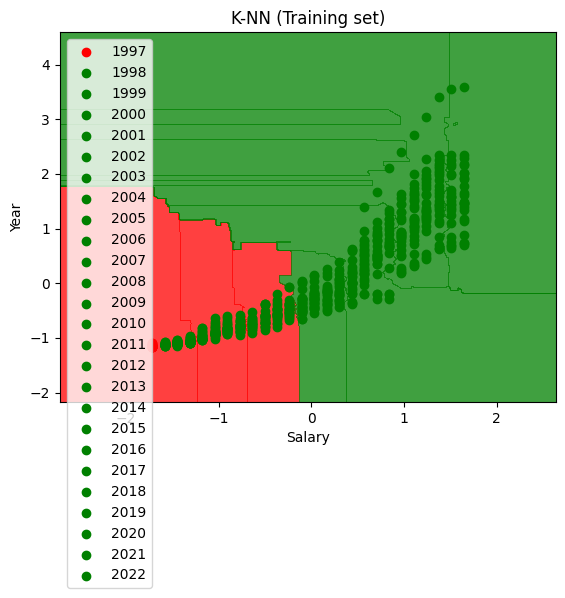

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Salary')
plt.ylabel('Year')
plt.legend()
plt.show()

<ipython-input-16-955cdabeab27>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


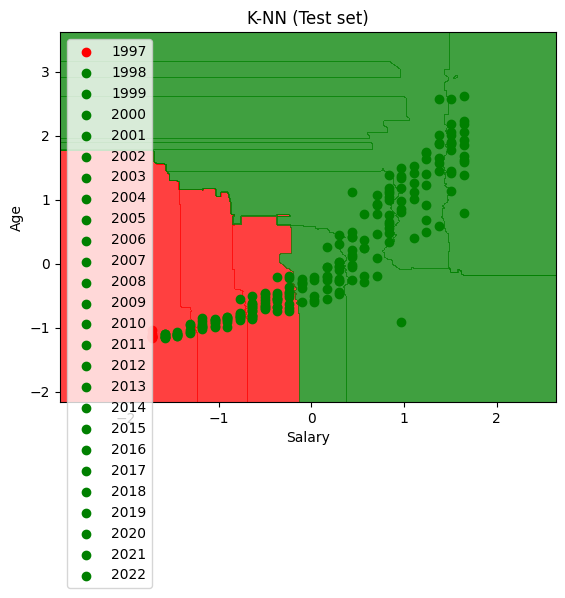

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()